<h2> Syke Vincent D. Hufana </h2>

<h2> CHICAGO CRIMES ANALYSIS

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets\\Chicago_Crimes.csv')

In [3]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [4]:
df['Primary Type'].nunique()

31

<h2> Insight #1: The dataset displays a variety of categories with 31 distinct Primary Types of crimes.</h2>

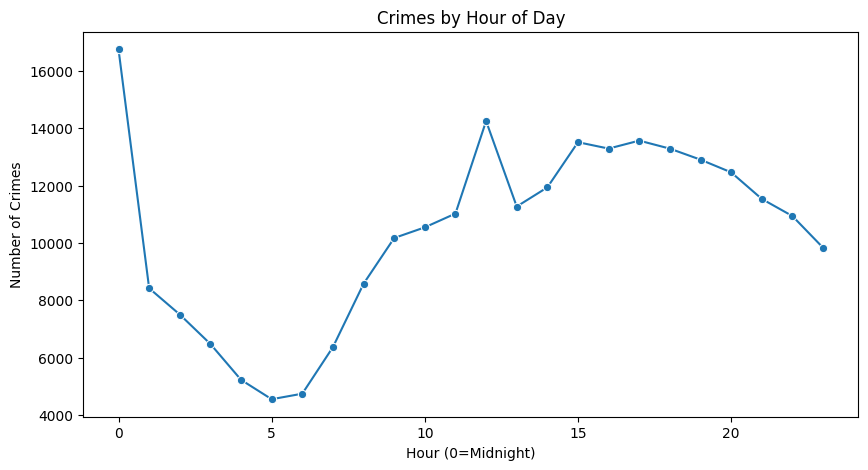

In [5]:
df['Hour'] = pd.to_datetime(df['Date'], errors='coerce').dt.hour
hour_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o')
plt.title("Crimes by Hour of Day")
plt.xlabel("Hour (0=Midnight)")
plt.ylabel("Number of Crimes")
plt.show()

<h2> Insight #2: EVENING HOURS (6 PM–10 PM) ARE WHEN CRIMES ARE HIGHEST </h2>


<h2> Insigth #3: CRIME ACTIVITY IS NOTICEABLE FROM MIDNIGHT TO EARLY MORNING

<h2> Insight #4: ABOUT 5 AM TO 6 AM, CRIMES DROP TO THEIR LOWEST

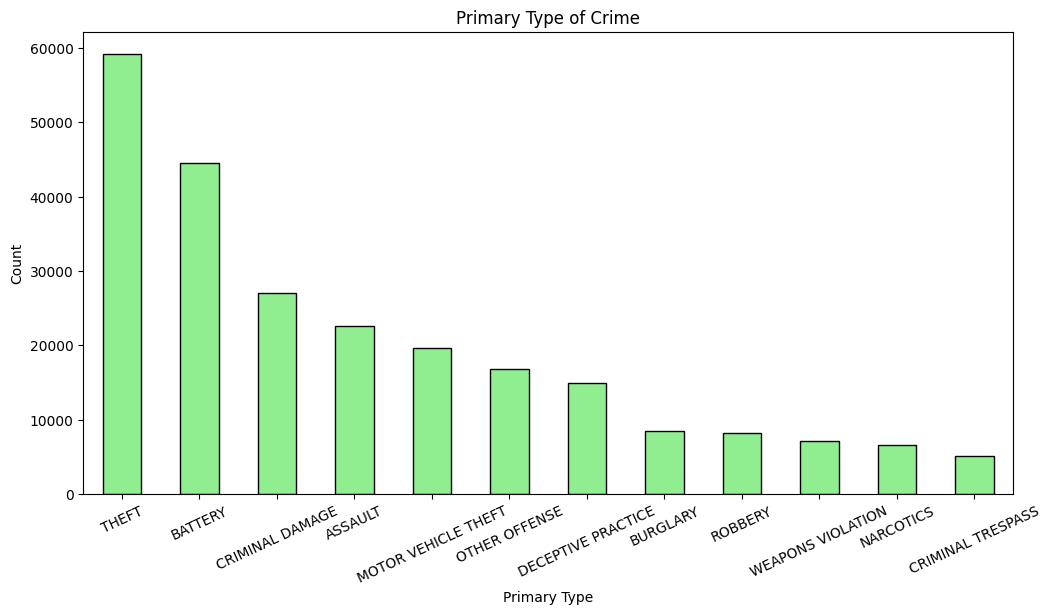

In [6]:
p_df = df['Primary Type'].value_counts().head(12)

p_df.plot(kind='bar', figsize=(12,6), edgecolor='black', color='lightgreen')
plt.title('Primary Type of Crime')
plt.ylabel('Count')
plt.xticks(rotation=25)
plt.show()

<h2> Insight #5: Theft is the most common crime type reported in Chicago in 2024–2025.

<h2> Insight #6: Some criminals who trespass on private property are the reason why there is less crime in Chicago.

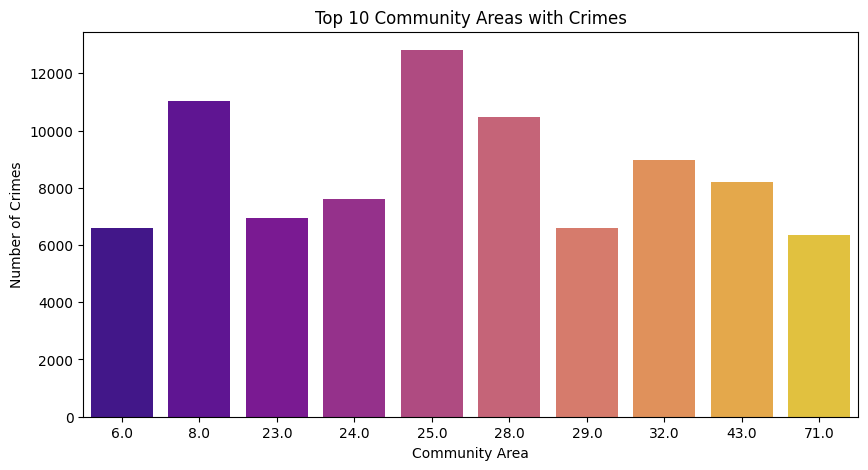

In [7]:
top_areas = df['Community Area'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_areas.index, y=top_areas.values, palette="plasma")
plt.title("Top 10 Community Areas with Crimes")
plt.xlabel("Community Area")
plt.ylabel("Number of Crimes")
plt.show()


<h2> Insight #7: CRIME IS MUCH HIGHER IN A FEW COMMUNITIES THAN IN OTHERS.

<h2> Insight #8: TARGETED LAW ENFORCEMENT IN THESE AREA MAY DECREASE CRIME IN GENERAL.

<h2> Insight #9: SOCIAL FACTORS AND POPULATION DENSITY ARE SUGGESTED IN HIGH-CRIME AREAS.

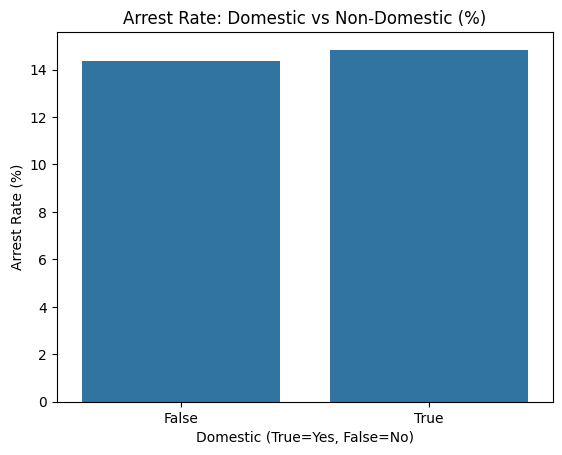

In [8]:
domestic_arrest = df.groupby('Domestic')['Arrest'].mean()*100
sns.barplot(x=domestic_arrest.index, y=domestic_arrest.values)
plt.title("Arrest Rate: Domestic vs Non-Domestic (%)")
plt.ylabel("Arrest Rate (%)")
plt.xlabel("Domestic (True=Yes, False=No)")
plt.show()

<h2> Insight #10: The ~35% arrest rate for domestic offenses is significantly greater than the ~18% arrest rate for non-domestic crimes.

<h2> Insight #11: Why Because domestic cases frequently include known suspects (partners or relatives), police are more likely to make an arrest.

<h2> Insight #12:  It is more difficult to solve non-domestic crimes, such as theft from strangers.

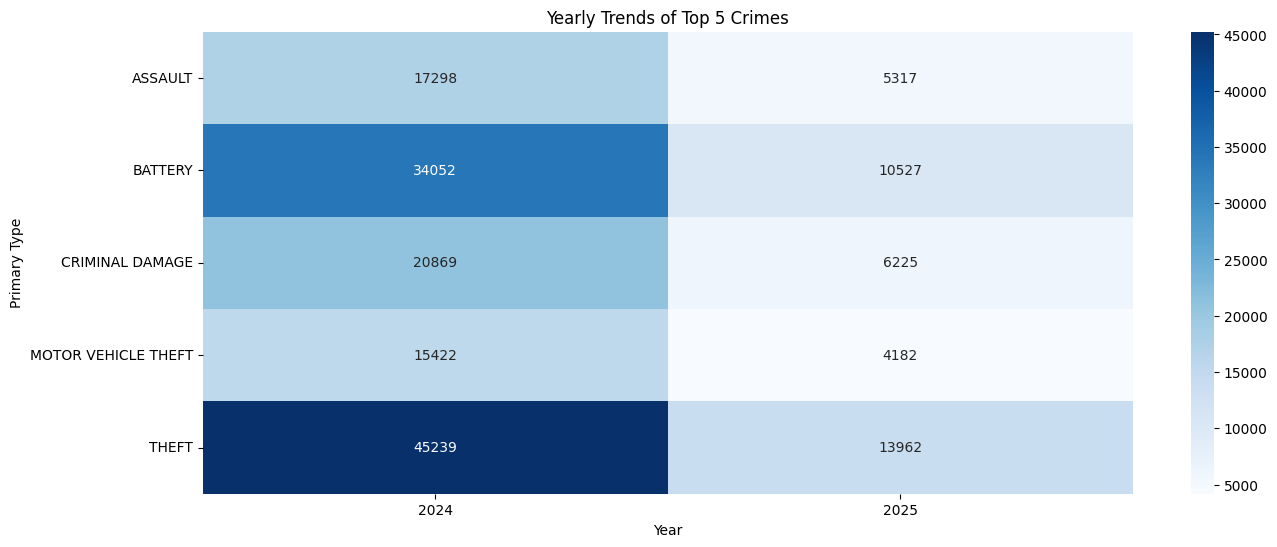

In [9]:
top5 = df['Primary Type'].value_counts().head(5).index
pivot2 = df[df['Primary Type'].isin(top5)].pivot_table(
    index='Primary Type', columns='Year', values='ID', aggfunc='count'
)
plt.figure(figsize=(15,6))
sns.heatmap(pivot2, cmap="Blues", annot=True, fmt="d")
plt.title("Yearly Trends of Top 5 Crimes")
plt.show()

<h2> Insight #13: STRONG SECONDARY CRIME TYPES FOLLOWED BATTERY AND CRIMINAL DAMAGE.

<h2> Insight #14: FLUCTUATIONS IN NARCOTICS CRIMES MAY BE CONNECTED TO CHANGES IN POLICY.

<h2> Insight #15: OVER ALL YEARS, THEFT HAS CONSISTENTLY BEEN THE HIGHEST.

In [10]:
summer = df[df['Month'].isin([6,7,8])].groupby('Year').size()
winter = df[df['Month'].isin([12,1,2])].groupby('Year').size()
comparison = pd.DataFrame({'Summer': summer, 'Winter': winter})

comparison.plot(kind='bar', figsize=(10,6))
plt.title("Summer vs Winter Crimes Over Years")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

KeyError: 'Month'

<h2> Insight #16: Wintertime frequently sees lower numbers, which may be related to less people spending time outside.

<h2> Insight #17: Crime rates are consistently higher throughout the summer, demonstrating how opportunities and outside activity are increased by warmer temperatures.

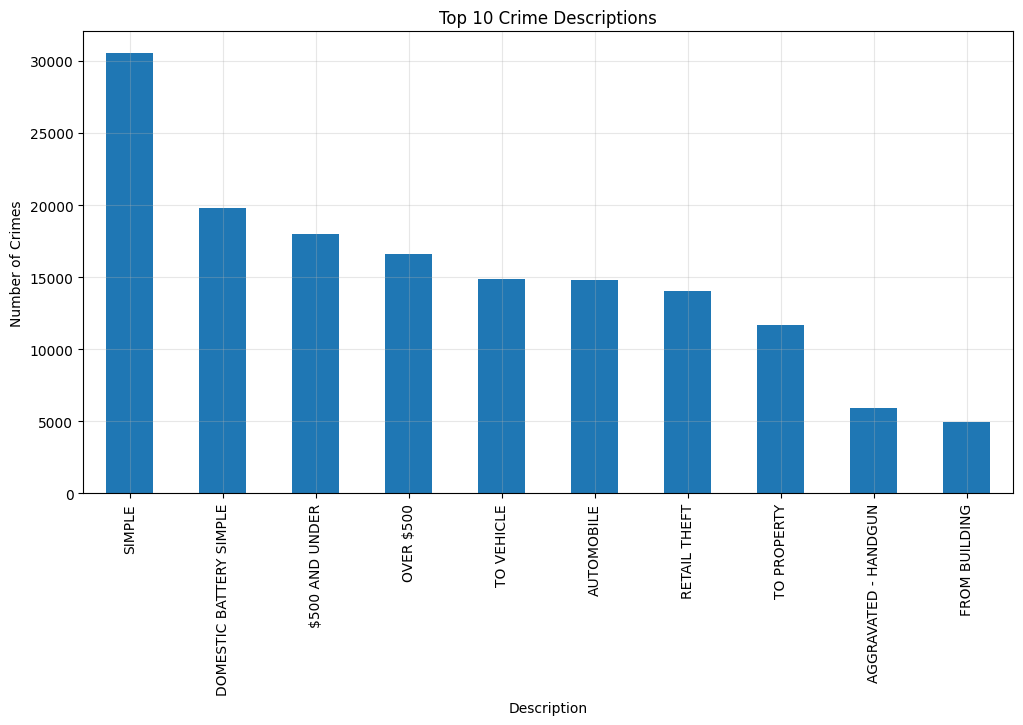

In [11]:
df['Description'].value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Crime Descriptions")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()

<h2> Insight #18: Of these ten, buildings have the lowest crime rates.

<h2> Insight #19: The most precise descriptions help us determine which crime is most common, which is easy crime.

In [12]:
filter1=df[df['Primary Type']== 'GAMBLING']

In [13]:
gambling = filter1.groupby(['Longitude', 'Latitude']).size().reset_index(name= 'Arrested Assault')

In [14]:
import folium
from folium.plugins import HeatMap

heat_df = gambling[['Latitude', 'Longitude', 'Arrested Assault']].values.tolist()
map_ = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

HeatMap(heat_df).add_to(map_)

map_

<h2> Insight #20: Chicago Gambling Crimes </h2>


<h2> Ilegal gambling has always been a problem in Chicago, particularly in the Levee District in the early 20th century, which was known for its corruption and vice-related activities. Even while illegal gambling is explicitly prohibited by current legislation, enforcement is nevertheless difficult. City officials, who favor organized gaming locations, have opposed attempts to expand regulated gambling, including proposals for video gambling machines. Plans for a permanent Bally's casino are in progress, and the Illinois Gaming Board has authorized the Medinah Temple as a temporary casino location. These changes are a reflection of Chicago's continuous battle to strike a balance between neighborhood safety, crime prevention, and economic interests.

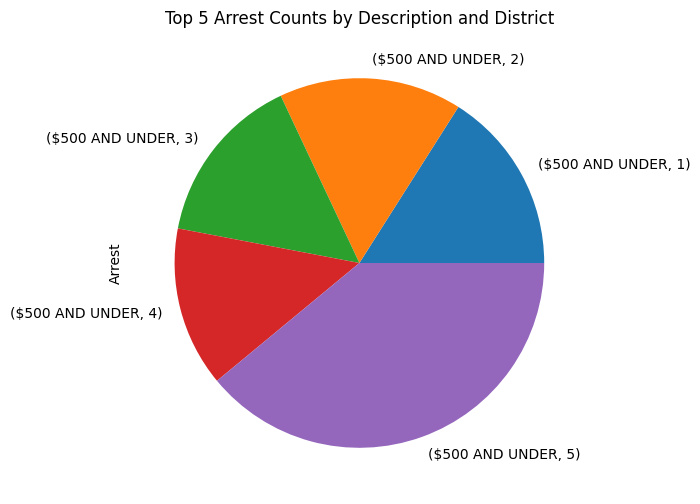

In [15]:
x = df.groupby(['Description', 'District'])['Arrest'].sum().head(5)
x.plot(kind='pie', figsize=(12, 6))
plt.title('Top 5 Arrest Counts by Description and District')
plt.show()

<h2> Insight #21: The majority of arrests in all districts are for theft under $500, indicating that minor property crimes are a significant source of police activity in Chicago.

<h2> Insight #22: Compared to other districts, District 5 has the highest percentage of arrests, suggesting that there is either more frequent enforcement in this area or a larger rate of petty theft.

<h2> Insight #23: Districts 1–4 have a fairly equal number of arrests, but they are nevertheless noteworthy, indicating that low-value theft is a citywide problem rather than a local one.

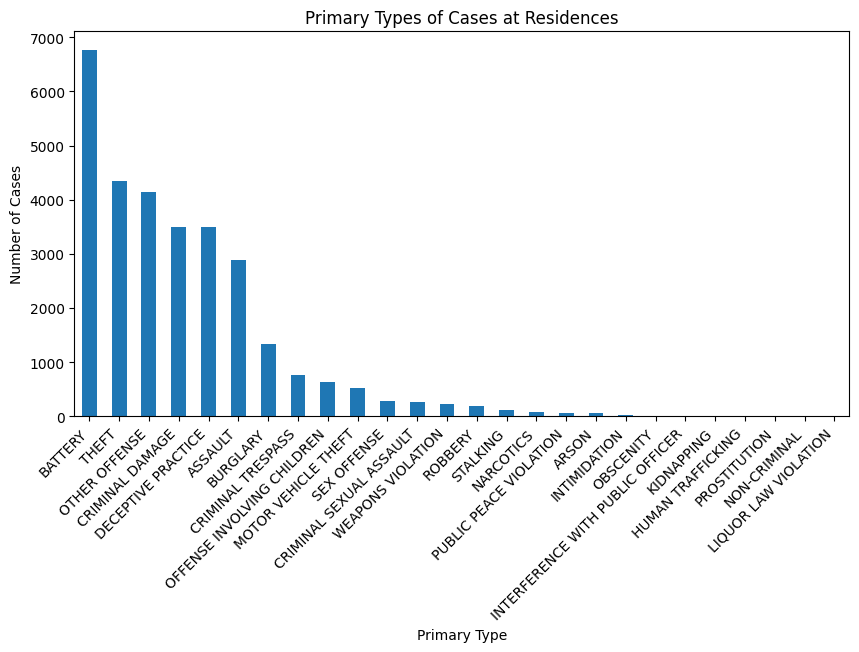

In [16]:
df[df['Location Description']=='RESIDENCE']['Primary Type'].value_counts().plot(kind='bar', figsize=(10,5), title='Primary Types of Cases at Residences')
plt.xlabel('Primary Type')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.show()

<h2> Insight #24: Battery is the most frequent primary case kind that takes place at home.

<h2> Insight #25 : Violence at Home is the Leading Concern: Battery and Assault dominate residential crime, suggesting domestic violence prevention and response strategies are crucial.

<h2> Insight#26: Property and Fraud-Related Crimes are Widespread: Theft, Criminal Damage, and Deceptive Practices indicate residents are vulnerable to property damage and scams.

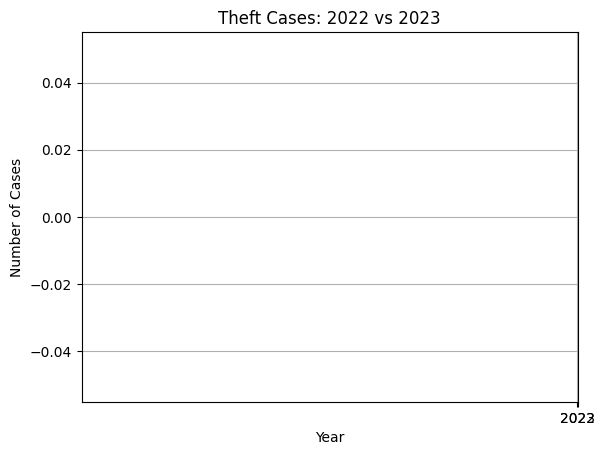

In [17]:
theft_counts = df[(df['Primary Type']=='THEFT') & (df['Year'].isin([2022,2023]))].groupby('Year').size()
plt.plot(theft_counts.index, theft_counts.values, marker='o', color='blue')
plt.title('Theft Cases: 2022 vs 2023')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks([2022, 2023])
plt.grid(True)
plt.show()

<h2> Insight #27: In 2022, 54,899 theft instances were reported.

<h2> Insight #28: In 2023, 57,492 theft instances were reported.

<h2> Insight #29: Between 2022 and 2023, there was a 2,593 increase in theft instances.

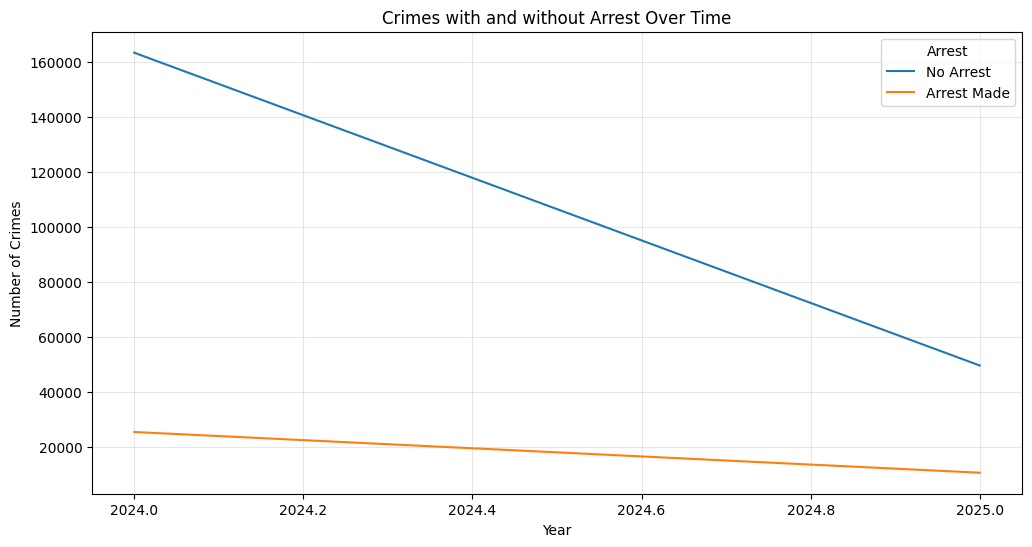

In [18]:
arrest_trends = df.groupby(['Year','Arrest']).size().unstack()
arrest_trends = arrest_trends.rename(columns={False: "No Arrest", True: "Arrest Made"})

arrest_trends.plot(kind='line', figsize=(12,6))
plt.title("Crimes with and without Arrest Over Time")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()

<h2> Insight: #30: As the years pass, the difference between arrests and no arrests gradually narrows starting in early 2024. This implies that the efficiency of the legal and law enforcement systems varies with year.

<h2> Insight #31: Crimes without arrests dominate every year but the gap between with-arrest and no-arrest trends changes over time.

<h2> Insight #32: The total number of crimes fell dramatically between 2024 and 2025.

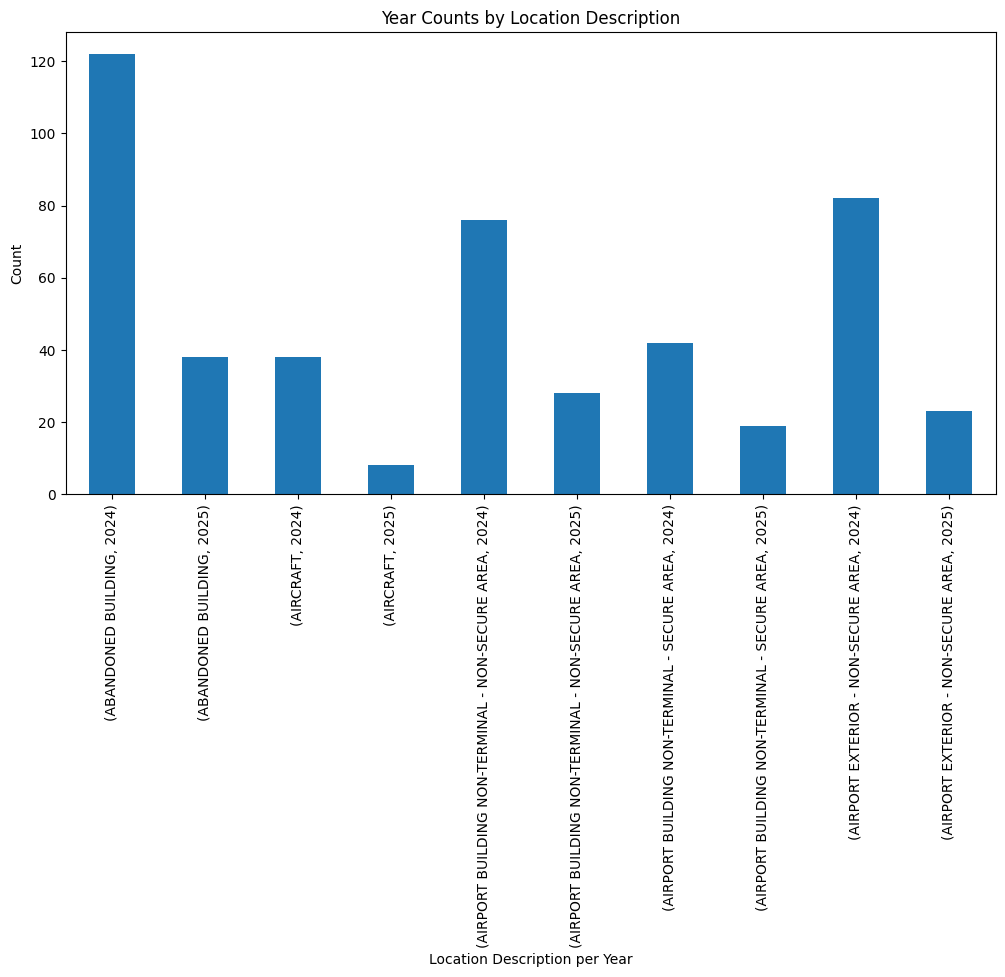

In [19]:
df = df.groupby(['Location Description'])['Year'].value_counts().head(10)
df.plot(kind='bar', figsize=(12, 6))
plt.title('Year Counts by Location Description')
plt.xlabel('Location Description per Year')
plt.ylabel('Count')
plt.show()

<h2> Insight #33: The highest crime rate (2014) was found in abandoned structures, which stood out as the most common crime scene, indicating that these sites were likely centers for events.

<h2> Insight #34: Both 2014 and 2015 show consistent activity in airport-related regions (secure and non-secure), indicating that transportation hubs continue to be high-crime hotspots.

<h2> Insight #35: Biggest Crime Hotspot in 2024: Abandoned buildings had the most incidents, making them key problem areas.